# RocketML text topic modeling using SVD
## Import Libraries

In [14]:
from rocketml.io import DocumentSet
from rocketml.decomposition import TruncatedSVD
from rocketml.preprocessing import TextFilter
from rocketml import Pipeline
import sys
import pandas as pd
import seaborn as sns

from bokeh.plotting import figure,show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.models.ranges import Range1d

%matplotlib inline

## Create Document Set

In [15]:
filename = "/home/ubuntu/examples/345_blogs_list.txt"
docset = DocumentSet(filename=filename)
tf = TextFilter(stop_word_filter=True,stemming_filter=True,length_filter=True)
svd = TruncatedSVD()
pipeline = Pipeline([tf,svd])
pipeline.fit(docset)
len(docset.documents)

text
------------------
Cluster Resources
------------------
Nodes        = 4
Sockets/node = 1
Cores/socket = 8
--------------------------
Total Cores    = 32
Total Memory(GB)   = 121.68
--------------------------
/shared/jobs_folder/010879f9/output.txt


137

## Plot Singular Values

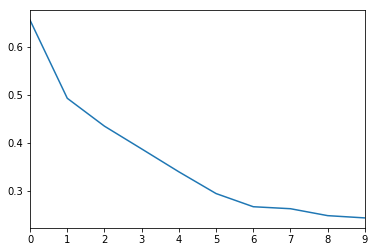

In [16]:
sns.tsplot(svd.singular_values_)

## Check term frequencies

In [18]:
df = pd.DataFrame([[key,value] for key,value in docset.terms_document_frequencies.iteritems()],columns=["Term","Frequency"])

In [19]:
df_high = df[df["Frequency"] > 120].sort_values(by=["Frequency"],ascending=False)

## Plot term frequencies using bokeh

In [10]:
output_notebook()

Loading BokehJS ...

In [11]:
source = ColumnDataSource(df_high)

In [20]:
p = figure(plot_width=1000,plot_height=500,title="Term Frequencies",x_range=df_high["Term"].values,y_range=Range1d(0,df_high["Frequency"].max()))
p.vbar(x="Term",top = "Frequency",width=0.2,source=source)
p.add_tools(HoverTool(tooltips=[("Term","@Term"),("Frequency","@Frequency")]))
show(p)